# Exploratory Data Analysis (Terrorism)


1.   trying to find out the hot zone of global terrorism.
2.   finding security issues and insights using EDA
3.   [Dataset](https://bit.ly/2TK5Xn5)

***Author: Andrijana Zivic***


# Importing data

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pip install modin[ray]

In [132]:
import modin.pandas as pd

In [168]:
from google.colab import files
uploaded = files.upload()

Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist (2).csv


In [218]:
df= pd.read_csv('globalterrorismdb_0718dist.csv', encoding= 'Latin1')
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: object(58), float64(55), int64(22)
memory usage: 187.1 MB


In [184]:
df.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [136]:
#number of cells
df.size

24528285

In [137]:
#number of NaN cells
(df.isna().sum()).sum()

13853997

In [185]:
#checking if there is a column with all NaN numbers
df.isnull().values.all(axis=0)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

The number of NaN values in this data set is too big for all values to be dropped from the table, and there is no columns with all NaN numbers.
For this analysis it is preferably to analyize only the columns that have values important to research. 

In [219]:
#drop any column with less than 60% non-NA values.

df.dropna(thresh=int(df.shape[0]*0.6), axis=1, inplace=True)


In [199]:
df.shape

(181691, 58)

In [200]:
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weapdetail',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'scite1',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

# Basic facts:

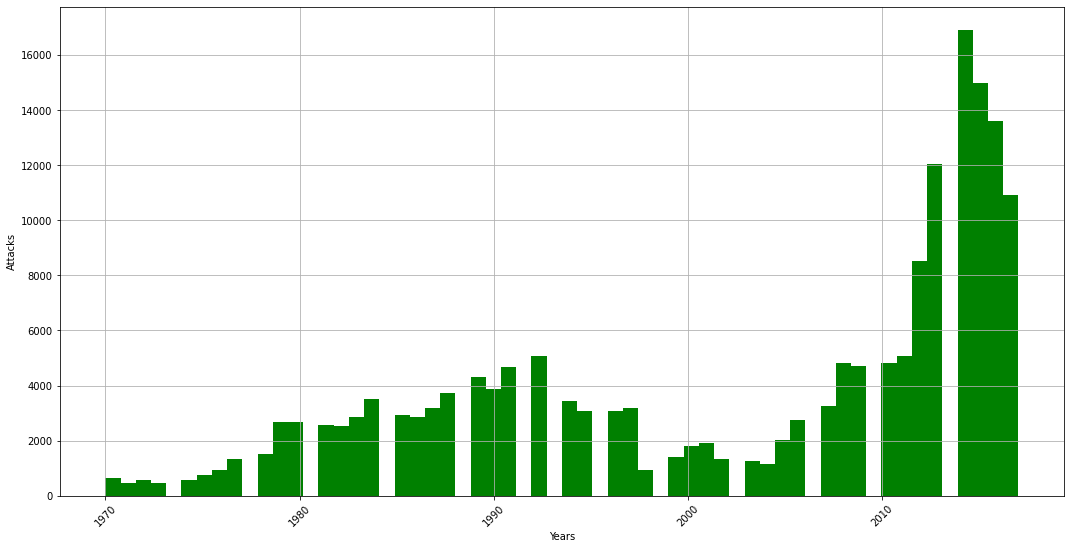

In [220]:
#number of terrorism attacks per years
plt.subplots(figsize=(18,9))
plt.grid(which='major')
plt.xticks(rotation=45)
plt.hist(df['iyear'], bins=60, color='green')
plt.xlabel('Years')
plt.ylabel('Attacks')
plt.show()

The number of terrorist activities have gone up sharply recent years.

In [221]:
#Top 3 Countries with the highest terrorism attacks are
tmp=df['country_txt'].value_counts().index[0:3]
print (tmp)
print('\nRegion with the highest terrorism attacks is:', df['region_txt'].value_counts().index[0])
print('\nThe higest number of people killed in one attack:', int(df['nkill'].max()))

Index(['Iraq', 'Pakistan', 'Afghanistan'], dtype='object')

Region with the highest terrorism attacks is: Middle East & North Africa

The higest number of people killed in one attack: 1570


In [222]:
df.drop(columns=('eventid', 'specificity', 'vicinity', 'ishostkid','latitude','longitude','provstate'), inplace=True)

In [223]:
df.head(5)

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,city,summary,crit1,nkillter,nwound,nwoundus,nwoundte,property,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,NaN,1,NaN,0.0,NaN,NaN,0,NaN,PGIS,0,0,0,0
1,1970,0,0,0,130,Mexico,1,North America,Mexico city,NaN,1,NaN,0.0,NaN,NaN,0,NaN,PGIS,0,1,1,1
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Unknown,NaN,1,NaN,0.0,NaN,NaN,0,NaN,PGIS,-9,-9,1,1
3,1970,1,0,0,78,Greece,8,Western Europe,Athens,NaN,1,NaN,NaN,NaN,NaN,1,NaN,PGIS,-9,-9,1,1
4,1970,1,0,0,101,Japan,4,East Asia,Fukouka,NaN,1,NaN,NaN,NaN,NaN,1,NaN,PGIS,-9,-9,1,1


In [224]:
df['extended'].value_counts()

0    173452
1      8239
dtype: int64

Attacks are mostly not extended. 

In [225]:
import warnings
warnings.filterwarnings("ignore")


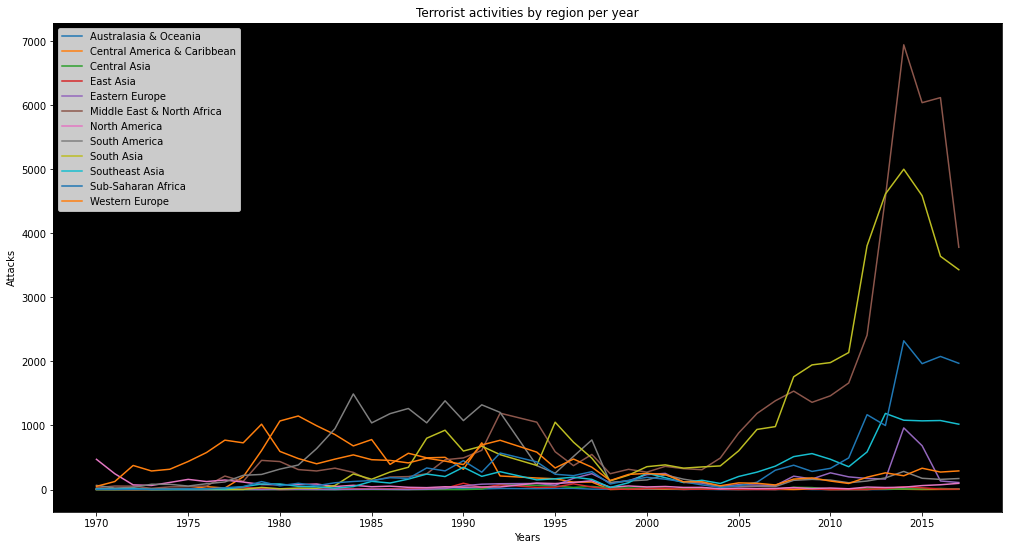

In [259]:
#Terrorist activities by region per year

pd.crosstab(df.iyear, df.region_txt).plot( figsize=(17,9))
plt.title('Terrorist activities by region per year')
plt.xlabel('Years')
plt.ylabel('Attacks')
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
ax=plt.axes()
ax.set_facecolor('#000000')
plt.legend()

In [208]:
df['attacktype1_txt'].value_counts()


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
dtype: int64

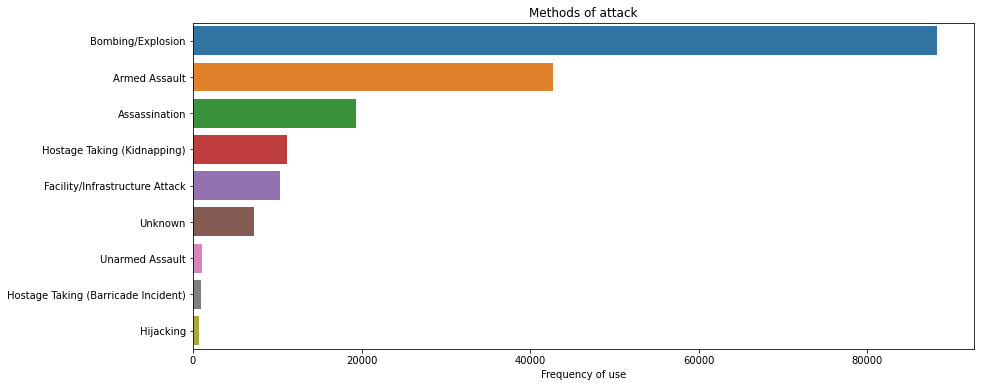

In [209]:
plt.figure(figsize=(14,6))
sns.barplot(y=df['attacktype1_txt'].value_counts().index, x=df['attacktype1_txt'].value_counts().values, palette='tab10')
plt.title('Methods of attack')
plt.xlabel('Frequency of use')
plt.show()

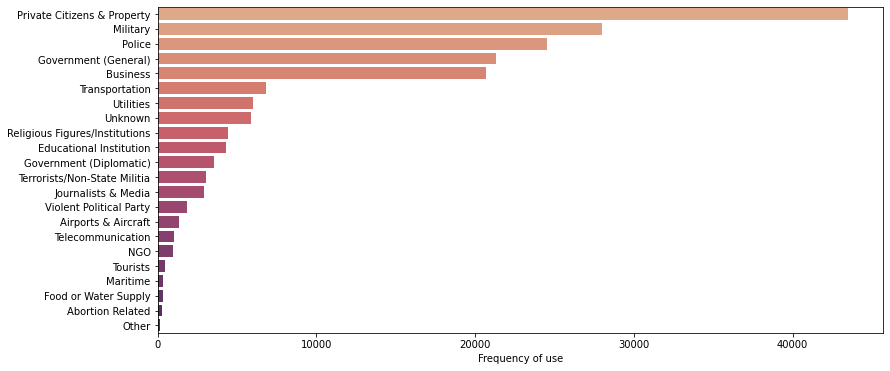

In [226]:
plt.figure(figsize=(13,6))
sns.barplot(y=df['targtype1_txt'].value_counts().index, x=df['targtype1_txt'].value_counts().values, palette='flare')
plt.xlabel('Frequency of use')
plt.show()

Most targetted are Private Citizens & Property, Military and Police. They were most often bombed and killed with explosives. 

In [211]:
df['gname'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Organization for the Defense of Detainees Rights        1
Sham 'unite                                             1
Socialist Labor Party of Lebanon                        1
Gunmen loyal to Mohammad Farah Aideed                   1
Christian Group for the Respect for Life                1
Length: 3537, dtype: int64

Text(0, 0.5, 'Terrorist groups')

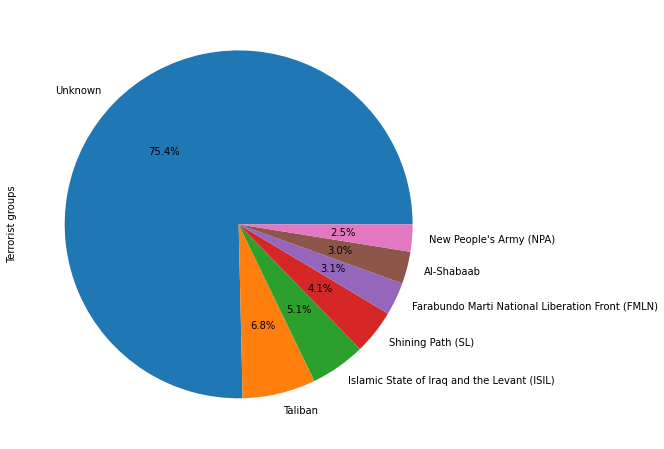

In [212]:
plt.figure(figsize=(15,8))
tmp=df['gname'].value_counts()
tmp[:7].plot.pie(autopct='%.1f%%')
plt.ylabel('Terrorist groups')

The most common terrorist groups are unknown, while, of the known ones, the Taliban, ISIL, SL and FMLN are at the top of the scale in terms of frequency. 

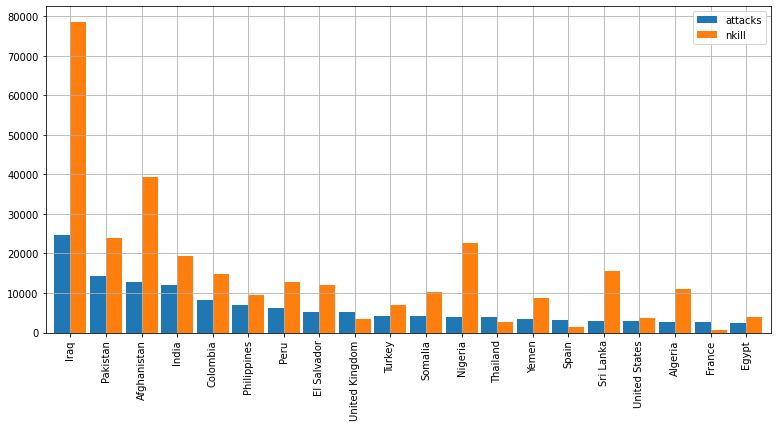

In [281]:
terror=df['country_txt'].value_counts()[:20].to_frame()
terror.columns=['attacks']
ckill=df.groupby('country_txt')['nkill'].sum().to_frame()
terror.merge(ckill, left_index=True, right_index=True, how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.grid()
plt.show()

In Iraq: The number of killed citizens is almost 3x higher than the number of attacks. It would be good to work on the security and defense forces of this state.

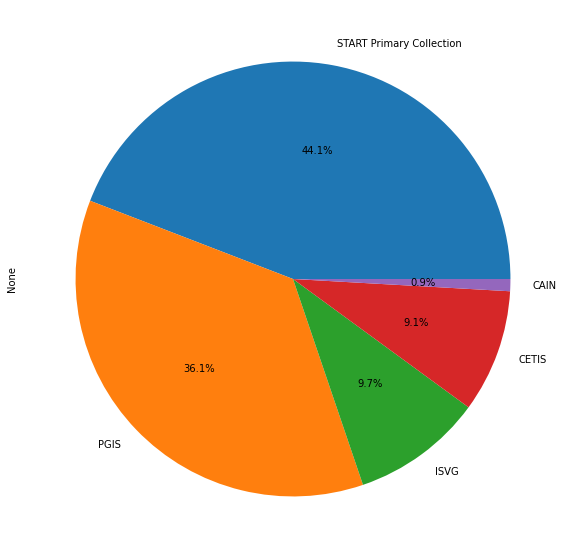

In [284]:
plt.figure(figsize=(16,10))
tmp=df['dbsource'].value_counts()
tmp[:5].plot.pie(autopct='%.1f%%')

At the very end, the pie plot presented the top five sources of information gathered.